In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pgeocode

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [78]:
sold = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_treated.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string', 'po_box':'object'}, parse_dates = ['prev_sold_date'])

In [79]:
sold.columns

Index(['brokered_by', 'price', 'street', 'city', 'state', 'zip_code',
       'prev_sold_date', 'county', 'po_box', 'bed', 'bath', 'acre_lot',
       'house_size', 'avgtemp', 'maxtemp', 'mintemp', 'precipitation',
       'population', 'density', 'dhighway', 'dlairport', 'dmairport', 'dshore',
       'nobusiness', 'totalincome', 'adjustedincome', 'tax_returns',
       'missing_bed', 'missing_bath', 'missing_acre', 'missing_size'],
      dtype='object')

In [80]:
# Add lat/long columns based on zip code
nomi = pgeocode.Nominatim('us')
location_data = nomi.query_postal_code(sold['zip_code'].tolist())
sold['latzip'] = location_data['latitude'].values
sold['longzip'] = location_data['longitude'].values

In [81]:
# One hot encode state column
sold_dummy = pd.get_dummies(sold['state']).astype('int')
# enc = OneHotEncoder(sparse_output=False).astype('int')
# col = sold[['state']]
# enc_col = enc.fit_transform(col)
# state_df = pd.DataFrame(enc_col)
sold = pd.concat([sold, sold_dummy], axis = 1)

In [82]:
# Frequency encode city, street and broker
sold['cityfreq'] = sold['city'].map(sold['city'].value_counts())
sold['streetfreq'] = sold['street'].map(sold['street'].value_counts())
sold['brokerfreq'] = sold['brokered_by'].map(sold['brokered_by'].value_counts())

In [83]:
# Split train/val and test before modelling
sold_train, sold_test = train_test_split(sold, test_size = 0.2, random_state=1)

Linear Regression (main dataset variables only)

In [84]:
# X = sold[['brokered_by', 'street', 'city', 'state', 'zip_code', 'prev_sold_date', 'bed', 'bath', 'acre_lot', 'house_size']]
X = sold_train[['bed', 'bath', 'acre_lot', 'house_size', 'latzip', 'longzip', 'cityfreq', 'streetfreq', 'brokerfreq', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']]
y = sold_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_val_pred = model.predict(X_val)

In [87]:
print('R^2', model.score(X_val, y_val))
print('RMSE', root_mean_squared_error(y_val, y_val_pred))
print('MAE', mean_absolute_error(y_val, y_val_pred))

R^2 0.4594368454723302
RMSE 363049.3468927382
MAE 212114.25748569053


Text(0, 0.5, 'Predicted')

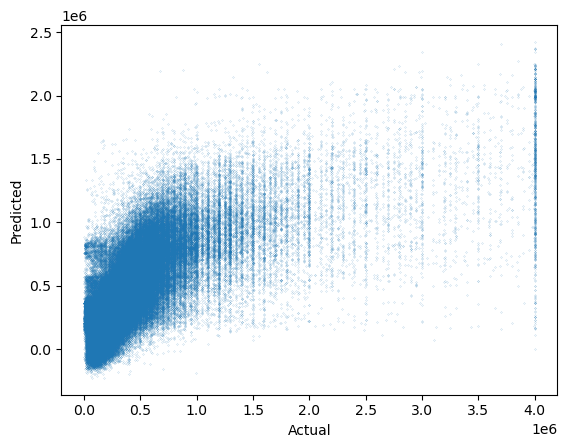

In [93]:
plt.scatter(y_val, y_val_pred, s = 0.01)
# plt.plot([min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))],[min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))], color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')